# Insurance Claim Prediction

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Summary Statistics](#Summary_Statistics)
        - 4.1.4 - [Missing Values](#Missing_Values)
        - 4.1.5 - [Correlation](#correlation)
        - 4.1.6 - [Analyze Categorical Variables](#categorical)
        - 4.1.7 - [Analyze Relationships Between Target and Categorical Variables](#categorical_numerical)
        - 4.1.8 - [Feature Engineering](#Feature_Engineering)
        - 4.1.9 - [Discover Outliers](#outliers)
        - 4.1.10- [Recheck the Correlation](#Recheck_Correlation)
    - 4.2 - [Prepare the Data](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [One-Way Anova](#one_way_anova)
        - 4.2.3 - [Dummy Encoding of Categorical Variables](#dummy)
5. **[Linear Regression (OLS)](#LinearRegression)**
    - 5.1 - [Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)](#withLog)
    - 5.2 - [Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)](#withoutLog)
    - 5.3 - [Fine Tune Linear Regression Model (OLS)](#Finetuning)
      - 5.3.1 - [Linear Regression after Removing Insignificant Variable (OLS)](#RemovingInsignificantVariable)
      - 5.3.2 - [Check the Assumptions of Linear Regression](#Assumptions)
          - 5.3.2.1 - [Detecting Autocorrelation](#Autocorrelation)
          - 5.3.2.2 - [Detecting Heteroskedasticity](#Heteroskedasticity)
          - 5.3.2.3 - [Linearity of Residuals](#Linearity_of_Residuals)
          - 5.3.2.4 - [Normality of Residuals](#Normality_of_Residuals)
      - 5.3.3 - [Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data](#RemovingInsignificantVariable_scaleddata)
      - 5.3.4 - [Linear Regression with Interaction (OLS)](#Interaction)
6. **[Regularization (OLS)](#regularization)**
    - 6.1 - [Ridge Regression Model (OLS)](#Ridge_Regression)
    - 6.2 - [Lasso Regression Model (OLS)](#Lasso_Regression)
    - 6.3 - [Elastic Net Regression Model (OLS)](#Elastic_Net)
7. **[Stochastic Gradient Descent - SGD (sklearn)](#StochasticGradientDescent)**
    - 7.1 - [Linear Regression with SGD (sklearn)](#LinearRegressionwithStochasticGradientDescent)
    - 7.2 - [Linear Regression with SGD using GridSearchCV (sklearn)](#StochasticGradientDescentwithGridSearchCV)
8. **[Conclusion and Interpretation](#rmse_and_r-squared)**    

<a id='import_lib'></a>
## 1. Import Libraries

**Let us import the required libraries and functions**

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

<a id='set_options'></a>
## 2. Set Options

In [ ]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
#pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

<a id='Read_Data'></a>
## 3. Read Data

<b>Read and display data to get insights from the data<br> 

In [2]:
# read csv file using pandas
df_insurance = pd.read_csv("healthinsurance.csv")

# display the top 5 rows of the dataframe
df_insurance.head()


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation


<a id='Data_Understanding'></a>
### 4.1 Understand the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

To know the dimensions of the data:

In [3]:
# .shape returns the dimension of the data
df_insurance.shape

(15000, 13)

We see the dataframe has 13 columns and 15000 observations.

<a id='Data_Types'></a>
### 4.1.2 Data Types

**1. Check data types**

In [4]:
# use .dtypes to view the data type of a variable
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

From the above output, we see that the data type of 'smoker', 'diabetes' and 'regular_ex' is 'int64'.
But according to data definition, 'smoker', 'diabetes' and 'regular_ex' are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

**2. Change the incorrect data types**

In [5]:
# convert numeric variable 'smoker' to object (categorical) variable
df_insurance.smoker = df_insurance.smoker.astype('object')

# convert numeric variable 'diabetes' to object (categorical) variable
df_insurance.diabetes = df_insurance.diabetes.astype('object')

# convert 'regular_ex' variable diabetes to object (categorical) variable
df_insurance.regular_ex = df_insurance.regular_ex.astype('object')

**3. Recheck the data types after the conversion**

In [6]:
# recheck the data types using .dtypes
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

Note the data types are now as per the data definition. Now we can proceed with the analysis.

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables.

**1. For numerical variables, we use .describe()**

In [7]:
# describe the numerical data
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


**2. For categorical features, we use .describe(include=object)**

In [8]:
df_insurance.describe(include = object)

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,Nashville,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


<a id='Missing_Values'></a>
### 4.1.4 Missing Values

In [9]:
Total = df_insurance.isnull().sum().sort_values(ascending=False) 
Percent = (df_insurance.isnull().sum()*100/df_insurance.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
bmi,956,6.373333
age,396,2.640000
sex,0,0.000000
weight,0,0.000000
hereditary_diseases,0,0.000000
no_of_dependents,0,0.000000
smoker,0,0.000000
city,0,0.000000
bloodpressure,0,0.000000
diabetes,0,0.000000


The missing values are present in the data for the `age` and `bmi` variables. There are 396 (2.6%) missing values for the variable `age` and 956 (6.4%) missing values for the variable `bmi`

### Visualize Missing Values using Heatmap

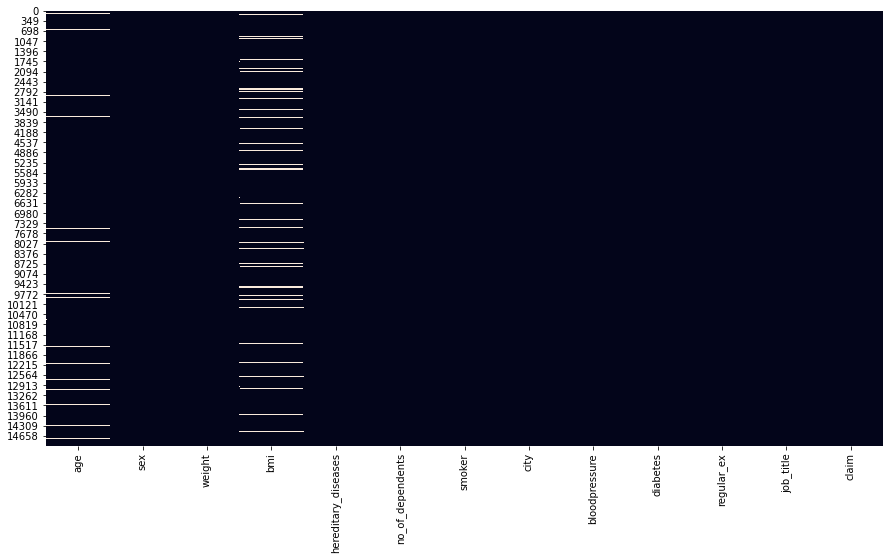

In [10]:
# set the figure size
plt.figure(figsize=(15, 8))
sns.heatmap(df_insurance.isnull(), cbar=False)

# display the plot
plt.show()

### Deal with Missing Values

How to deal with missing data?<br>

Depending on scenarios, we may:<br>
a. Drop the whole row<br>
b. Drop the whole column<br>

OR replace:<br>
a. The missing values with mean( if data is normal)<br>
b. The missing values with median (if data is skew)<br>
c. Replace it based on other functions<br><br>

The entire column is dropped only if most entries (80%-90%) in the column are missing. We have the option to either drop the rows containing the missing values or replace them. In our dataset, there are not many values that are missing. So, we opt to replace these values. For the variable 'age', we will replace missing values by the mean of age across the gender.

In [11]:
# check the average age for male and female
df_insurance['age'].groupby(df_insurance['sex'], axis=0).mean()

sex
female    39.361040
male      39.738395
Name: age, dtype: float64

The average age for the male and female is nearly the same. We will fill in missing values with the mean age of the policyholder.

In [12]:
# fill the missing values with the mean value of 'age'.
df_insurance['age'].fillna(df_insurance['age'].mean(), inplace=True)

Replace missing values by mean for the BMI.

In [13]:
# fill the missing values with the mean value of 'bmi'.
df_insurance['bmi'].fillna(df_insurance['bmi'].mean(), inplace=True)

We have seen that the the minimum bloodpressure is 0, which is absurd. It implies that these are missing values. 
Let us replace these missing values with the median value.

In [14]:
# calculate the median of the bloodpressure using 'median()''
median_bloodpressure = df_insurance['bloodpressure'].median()

# replace zero values by median using 'replace()'
df_insurance['bloodpressure'] = df_insurance['bloodpressure'].replace(0,median_bloodpressure) 

Recheck the summary statistics to confirm the missing value treatment for the variable 'bloodpressure'.

In [15]:
# obtain the summary statistics of numeric variables
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,72.228533,13401.437620
std,13.829705,13.701935,5.924606,1.228469,11.269793,12148.239619
min,18.000000,34.000000,16.000000,0.000000,40.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.800000,1.000000,71.000000,9545.650000
75%,51.000000,76.000000,34.100000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


To confirm the data is valid, observe the minimum and maximum value of the variable `bloodpressure` is 40, which can be possible with patients suffering from low bloodpressure.

Let's view the missing value plot once again to see if the missing values have been imputed.

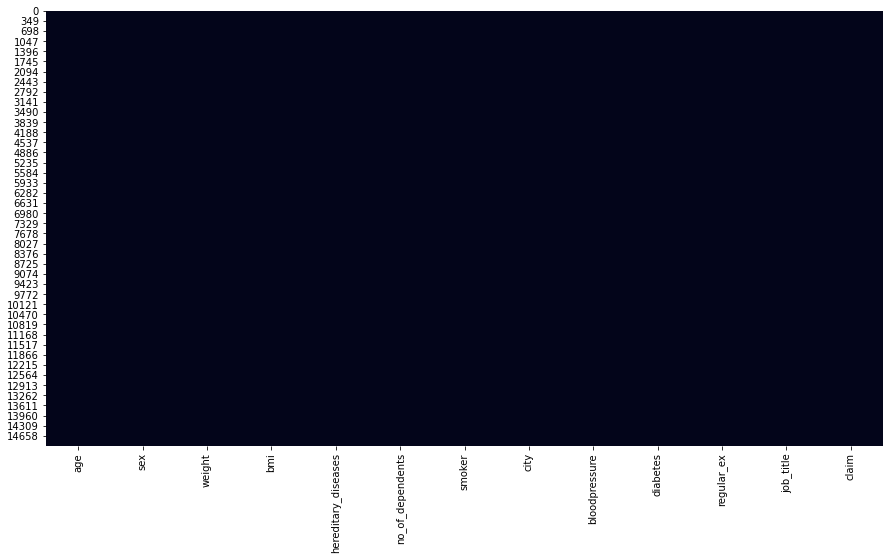

In [16]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
sns.heatmap(df_insurance.isnull(), cbar=False)

# display the plot
plt.show()

Now, we obtain the dataset with no missing values.

<a id='correlation'></a>
### 4.1.5 Correlation

<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    

**1. Filter out only the numeric variables from the dataframe**

In [17]:
# select the numerical features in the dataset.
df_numeric_features = df_insurance.select_dtypes(include=np.number)

# print the names of the numeric variables 
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

The dataframe df_numeric_features has 6 numeric variables.

**2.  Call the corr() function which will return the correlation matrix of numeric variables**

In [18]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.000000,0.281228,0.180123,0.058926,0.019223,0.298359
weight,0.281228,1.000000,0.243269,0.135687,0.018094,0.077716
bmi,0.180123,0.243269,1.000000,0.049704,-0.047979,0.197939
no_of_dependents,0.058926,0.135687,0.049704,1.000000,0.036976,0.067614
bloodpressure,0.019223,0.018094,-0.047979,0.036976,1.000000,0.037676
claim,0.298359,0.077716,0.197939,0.067614,0.037676,1.000000


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

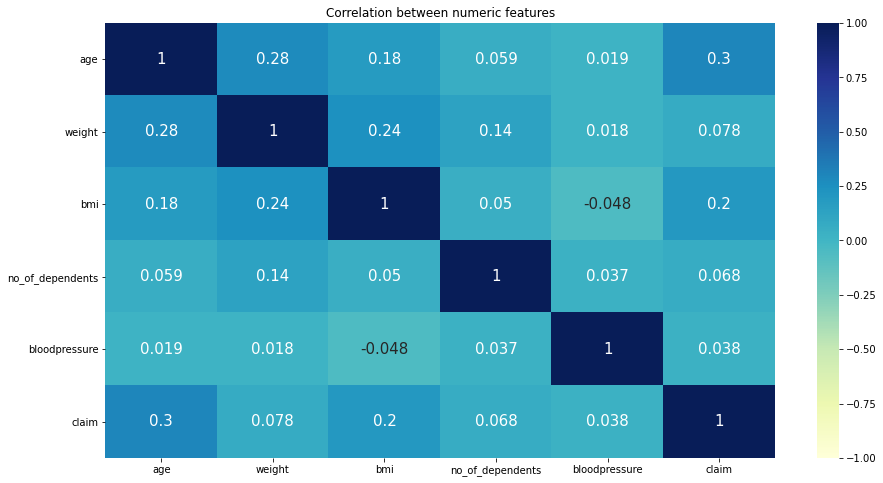

In [19]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# title
plt.title('Correlation between numeric features')

# display the plot
plt.show()

* It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data. 
* so this fit into one of assumptions of linear regression is that, there should be NO Multicollinearity present in the data.

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables
The values, distribution, and dispersion of categorical variables are best understood with bar plots.

First let us print the summary statistics of the categorical features.

In [20]:
# display the summary statistics of categorical variables
df_insurance.describe(include=object)

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,Nashville,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


There are 6 categorical variables. From the output we see that the variable cities has most number of categories. There are 91 cities in the data, of which NewOrleans occurs highes number of times.

Let us visualize the variables. However, we shall exculde the variable `city` from it.

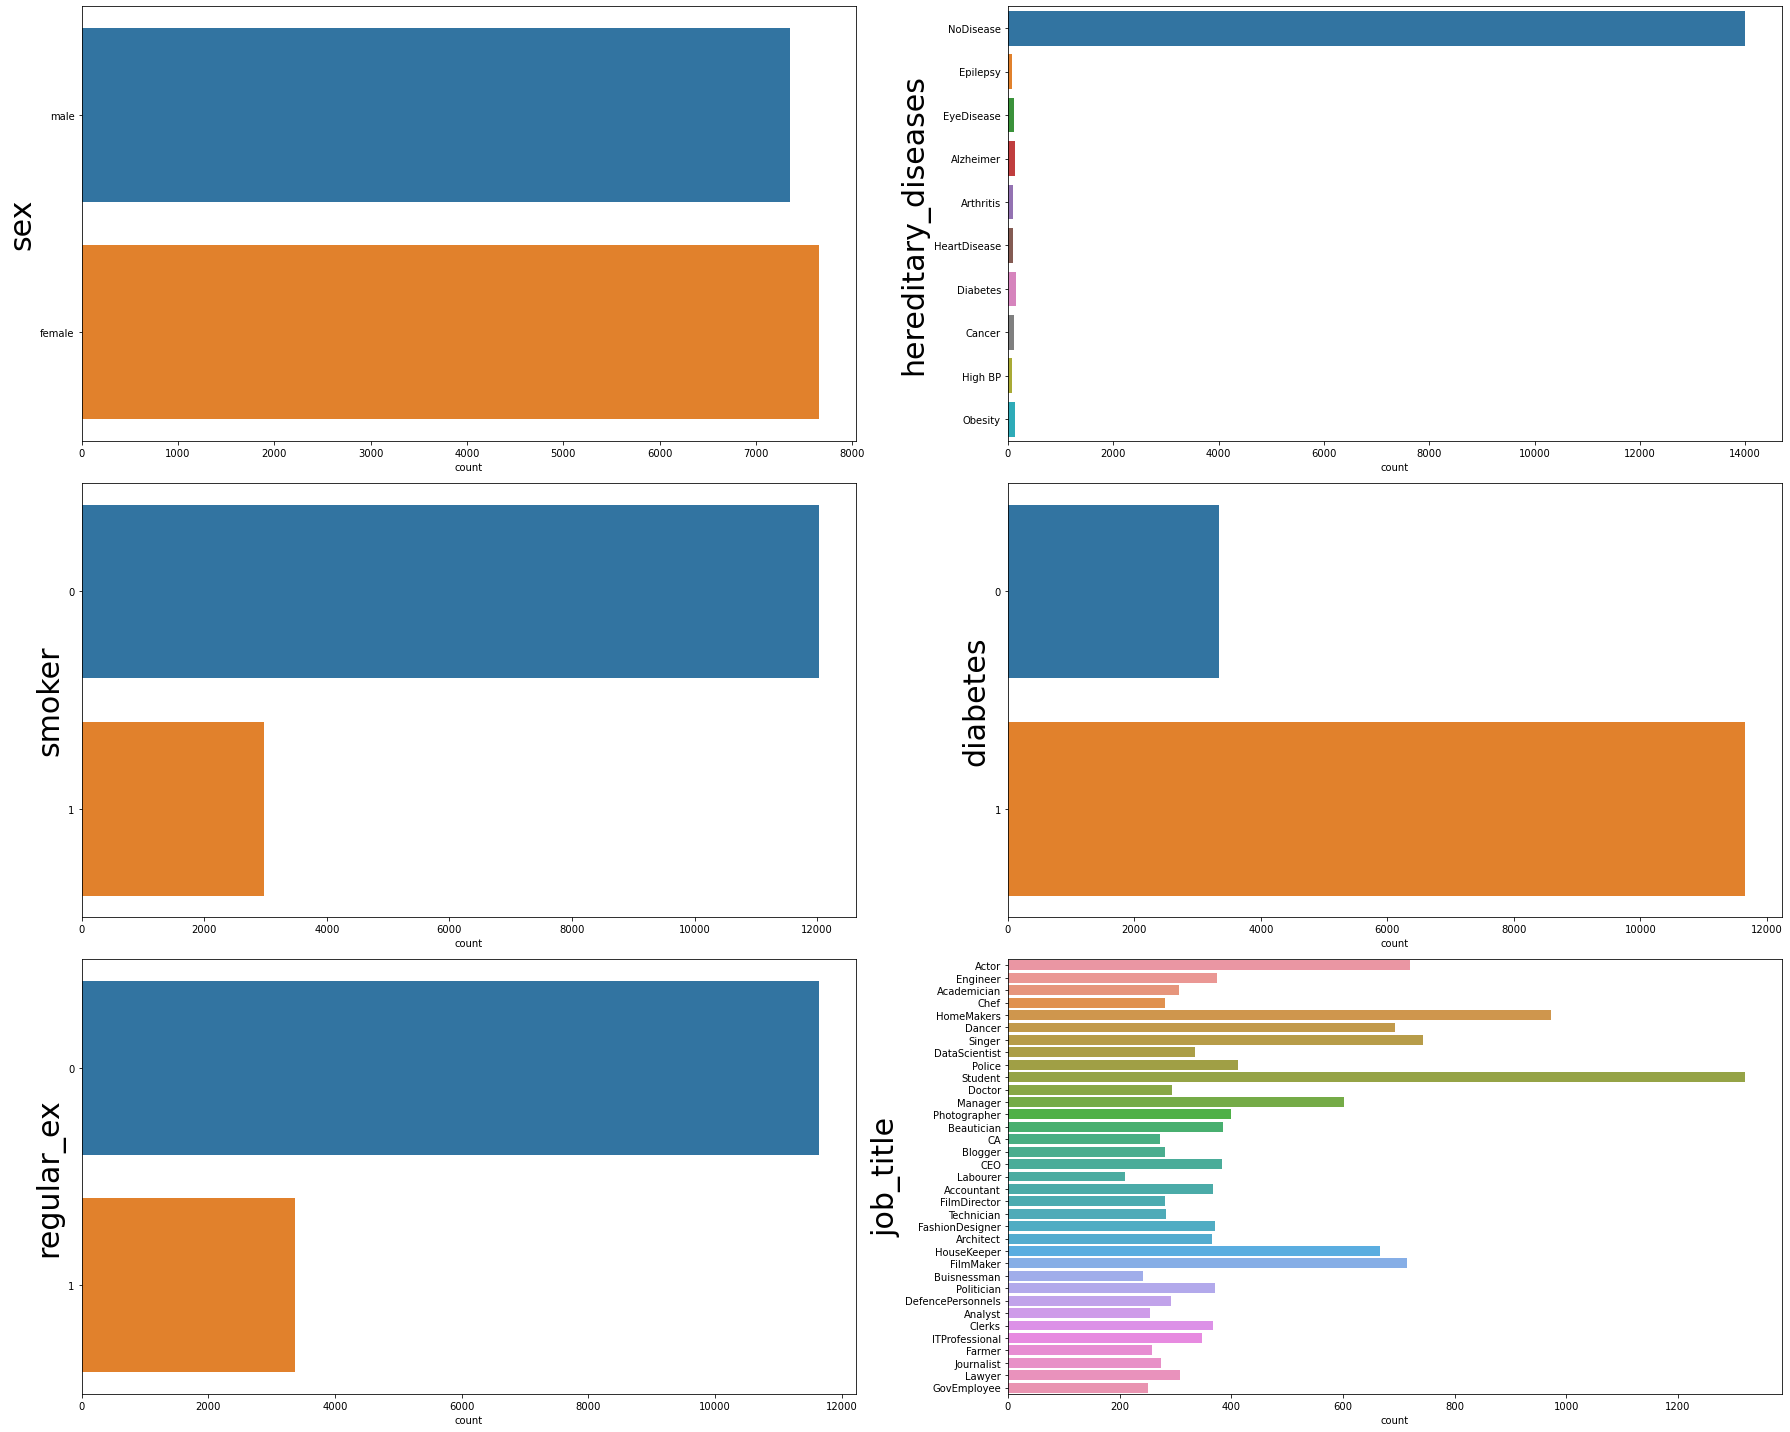

In [21]:
# create a list of all categorical variables
df_categoric_features = df_insurance.select_dtypes(include='object').drop(['city'], axis=1)

# plot the count distribution for each categorical variable 
fig, ax = plt.subplots(3, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # plot the count plot using countplot()
    countplot = sns.countplot(y=df_insurance[variable], ax=subplot )
       
    # set the y-axis labels 
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

From the above plot we see that:
                        <li> The number of males are femals are nearly equal
                        <li> Most of the people in the data have no underlined disease </li>
                        <li> Also the number of non smokers is significantly large </li>
                        <li> Most of the policyholder do not excercise regularly</li>
                        <li> Many of the policyholders have diabetes</li>
                        <li> The had has large number of students</li>
                

Now consider the variable `city`.

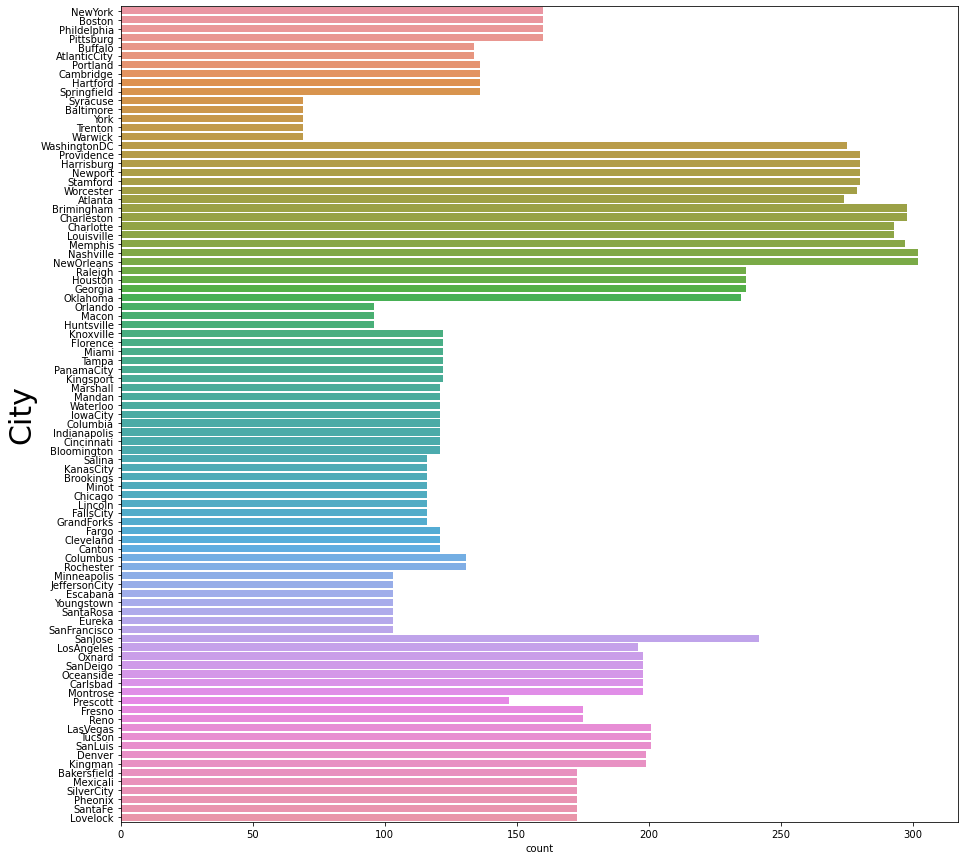

In [22]:
# set the figure size
plt.figure(figsize=(15, 15))

# plot the count plot using countplot()
countplot = sns.countplot(y=df_insurance['city'], orient="h")

# set the x-axis labels 
countplot.set_ylabel('City', fontsize = 30)

# display the plot
plt.show()

We see that there are many cities considered in the data. It is quite difficult to perform meaningful analysis on this variable.

<a id='categorical_numerical'></a>
### 4.1.7 Analyze Relationship Between Target and Categorical Variables
The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

Let’s start by creating box-and-whisker plots with seaborn’s boxplot method:

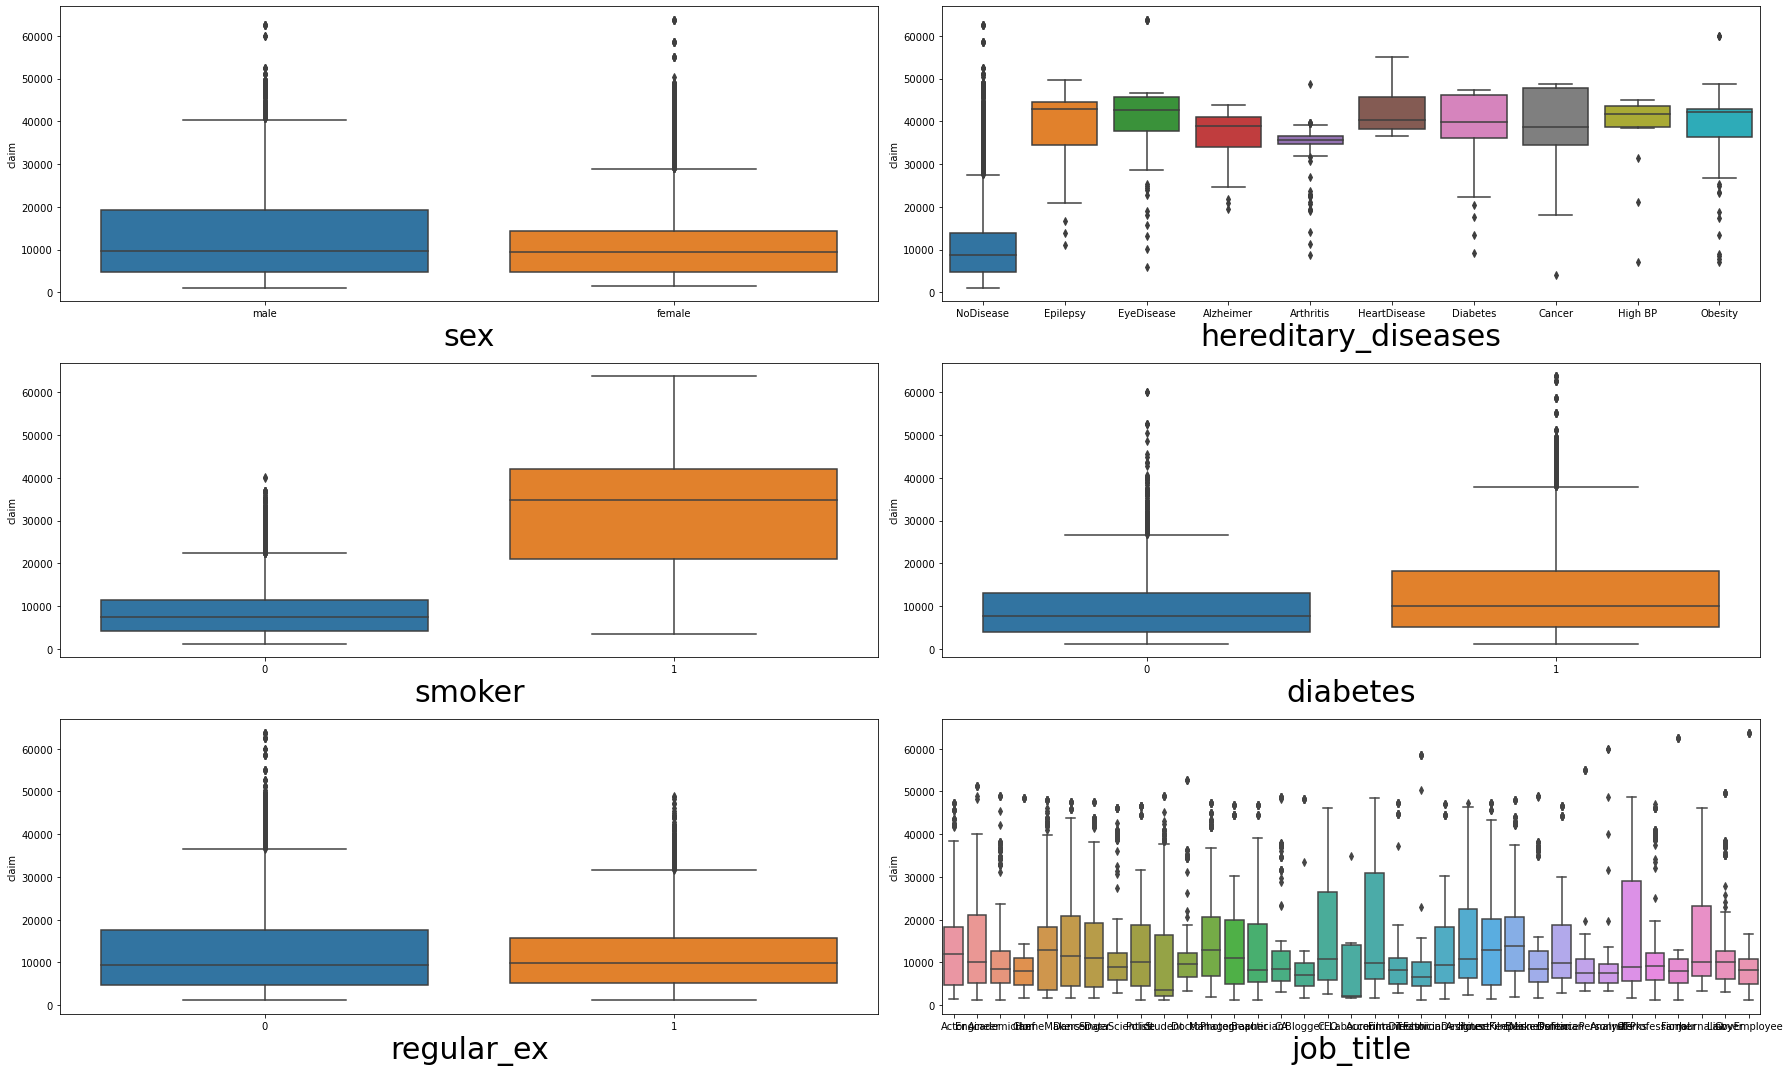

In [23]:
# plot the boxplot for each categorical variable 
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    boxplt = sns.boxplot(x=variable, y='claim', data=df_insurance, ax=subplot)
    
    # set the x-axis labels 
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

Since the variable `city` has 91 categories, we shall plot it separately.

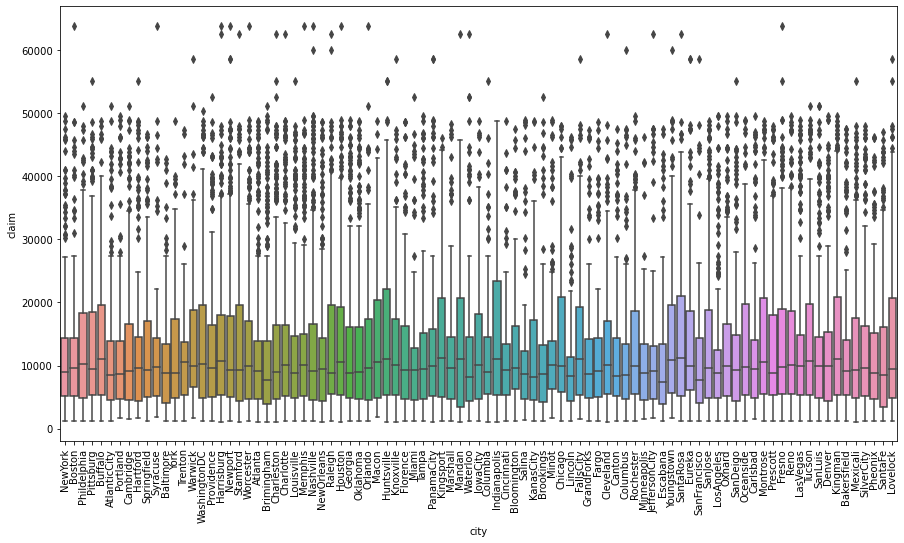

In [24]:
# set the figure size
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x=df_insurance["city"], y=df_insurance['claim'], data=df_insurance)

# set the x-axis labels 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10)

# display the plot
plt.show()

<li>We can see that 'hereditary_diseases' variable with 'NoDisease' class have very low average claim amount than other diseases. We can also see that there is a little variance in average claim cost between 'hereditary_diseases'</li>
<br>                       <li>The distribution of claim between the two categories, 'smoker'(1) and 'non-smoker'(0), are distinct enough to take smokers as a potentially good predictor of the claim amount. We can see that a 'non-smoker' has a median claim amount of around 10000 while a 'smoker' has a median claim of 40000.</li> <br>
                        <li> Also diabetic people have slightly higher average claim amount than non-diabetic people </li><br>
                        <li>This visualization helps us understand that there is a variance in average claim cost between different cities. However, the median claim cost is about 10000. As we can see, there are large number of cities and its not easy to interpret. Therefore we’ll combine all the cities into the region</li>
                       


<a id='Feature_Engineering'></a>
### 4.1.8 Feature Engineering

Create a new feature 'region' by combining the cities.

**There are 91 unique cities. We will divide these cities into North-East, West, Mid-West, and South regions.**

Let's create a new variable region. We will replace the original variable `city` with it.

In [25]:
# create a region column and combine the north-east cities
df_insurance['region'] = df_insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [26]:
# combine all the southern cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [27]:
# combine all the mid-west cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [28]:
# combine all the western cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [29]:
# check the unique values of the region.
df_insurance['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'West'], dtype=object)

In [30]:
df_insurance['region'].value_counts()

Southern      4444
West          4273
North-East    3471
Mid-West      2812
Name: region, dtype: int64

In [31]:
# drop the 'city' variable from the dataset using drop()
df_insurance = df_insurance.drop(['city'], axis=1)

Check whether the new variable added into the data frame or not.

In [32]:
# display the top 5 rows of the dataframe
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region
0,60.0,male,64,24.3,NoDisease,1,0,72.0,0,0,Actor,13112.6,North-East
1,49.0,female,75,22.6,NoDisease,1,0,78.0,1,1,Engineer,9567.0,North-East
2,32.0,female,64,17.8,Epilepsy,2,1,88.0,1,1,Academician,32734.2,North-East
3,61.0,female,53,36.4,NoDisease,1,1,72.0,1,0,Chef,48517.6,North-East
4,19.0,female,50,20.6,NoDisease,0,0,82.0,1,0,HomeMakers,1731.7,North-East


#### Analyze relationship between region and claim variable

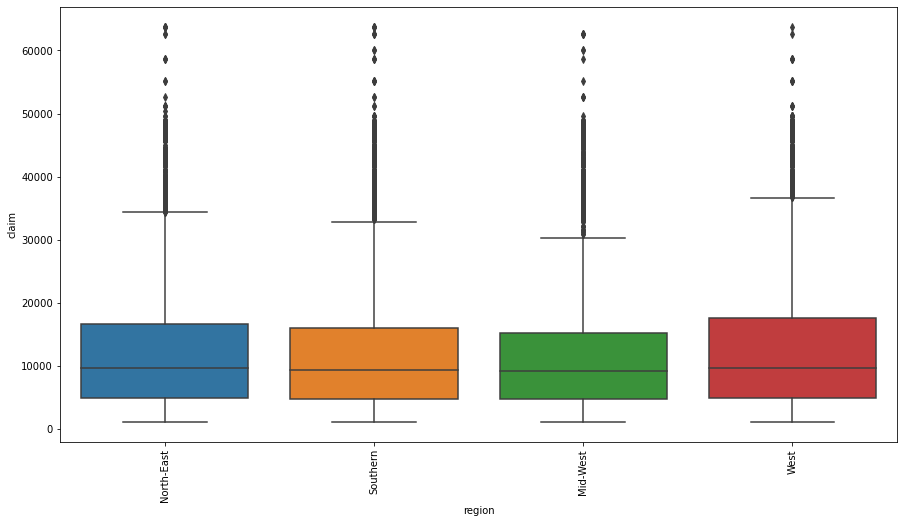

In [33]:
# set figure size
plt.figure(figsize=(15,8))

# boxplot of claim against region
ax = sns.boxplot(x="region", y="claim", data=df_insurance)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

The plot shows that there is not much significant difference in the variance of the insurance claim across the regions.

<a id='outliers'></a>
### 4.1.9 Discover Outliers

**1. Plot boxplot for numerical data**

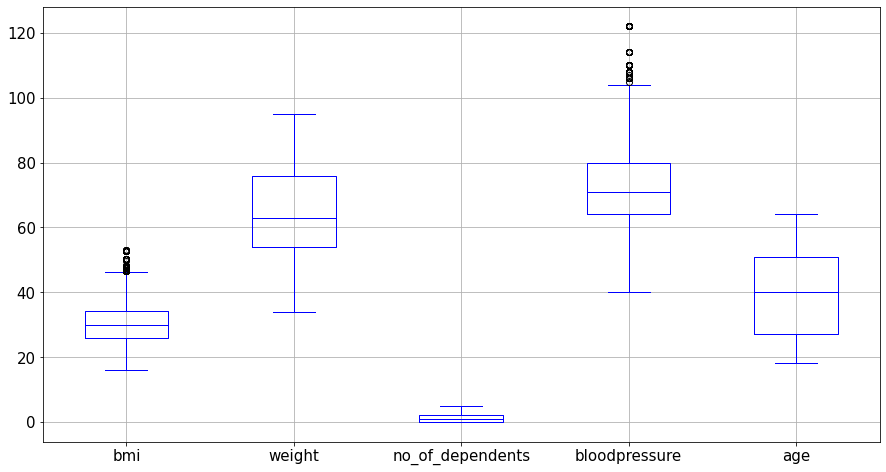

In [34]:
# set the plot size
plt.rcParams['figure.figsize']=(15,8)

# create a boxplot for all numeric features
df_numeric_features.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'] , color = 'blue' ,fontsize = 15 )

# to display the plot
plt.show()

**2. Note the variables for which outliers are present**

From the above plot, we notice that for the variable 'bmi' and 'bloodpressure' there are points above the upper extreme - these points are outliers<br>

Let us use the IQR method to remove the outliers

**3. Remove outliers by IQR method**

In [35]:
# calculate interquartile range 

Q1 = df_numeric_features.drop(['claim'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
Q3 = df_numeric_features.drop(['claim'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

age                 24.0
weight              22.0
bmi                  8.2
no_of_dependents     2.0
bloodpressure       16.0
dtype: float64


In [36]:
# filter out the outlier values
df_insurance = df_insurance[~((df_insurance < (Q1 - 1.5 * IQR)) | (df_insurance > (Q3 + 1.5 * IQR))).any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed

In [37]:
# check the shape of data using shape
df_insurance.shape

(14723, 13)

So that the above output shows there is a reduction in the number of rows(from 15000 to 14723). Now, to confirm that the outliers have been removed let us visualize using a boxplot.

**4. Plot boxplot to recheck for outliers**

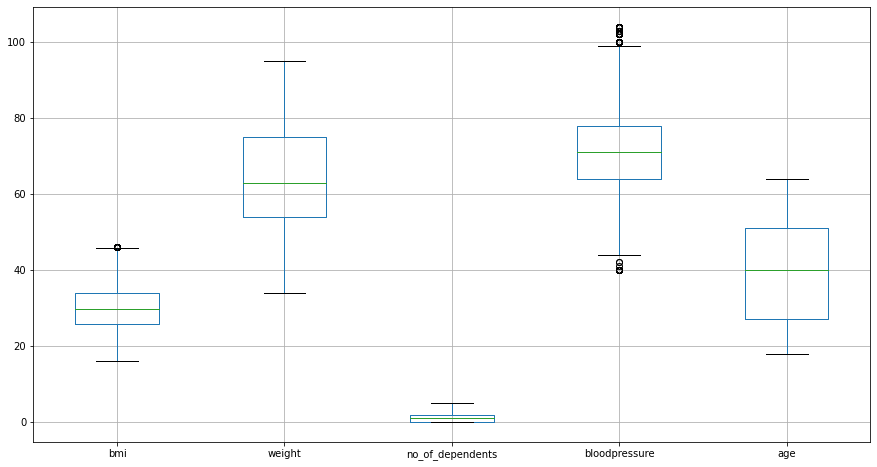

In [38]:
# set figure size 
plt.rcParams['figure.figsize']=(15,8)

# recheck for outliers
df_insurance.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])

# display only the plot
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that are moderate outliers that lie within the min/max range before removing the actual outliers

<a id='Recheck_Correlation'></a>
### 4.1.10 Recheck the Correlation
Recheck the correlation after treating outliers. An outlier might either decrease or increase a correlation coefficient, depending on where it is in relation to the other points

**1. Filter out only the numeric variables from the dataframe**

In [39]:
# filter the numerical features in the dataset
df_numeric_features = df_insurance.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

**2.  Call the corr() function which will return the correlation matrix of numeric variables**

In [40]:
# generate the correlation matrix 
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.000000,0.282136,0.196479,0.056423,0.023431,0.301544
weight,0.282136,1.000000,0.237473,0.134033,0.009877,0.080363
bmi,0.196479,0.237473,1.000000,0.044997,-0.055260,0.196193
no_of_dependents,0.056423,0.134033,0.044997,1.000000,0.027358,0.077775
bloodpressure,0.023431,0.009877,-0.055260,0.027358,1.000000,0.036679
claim,0.301544,0.080363,0.196193,0.077775,0.036679,1.000000


**3. Pass the correlation matrix**

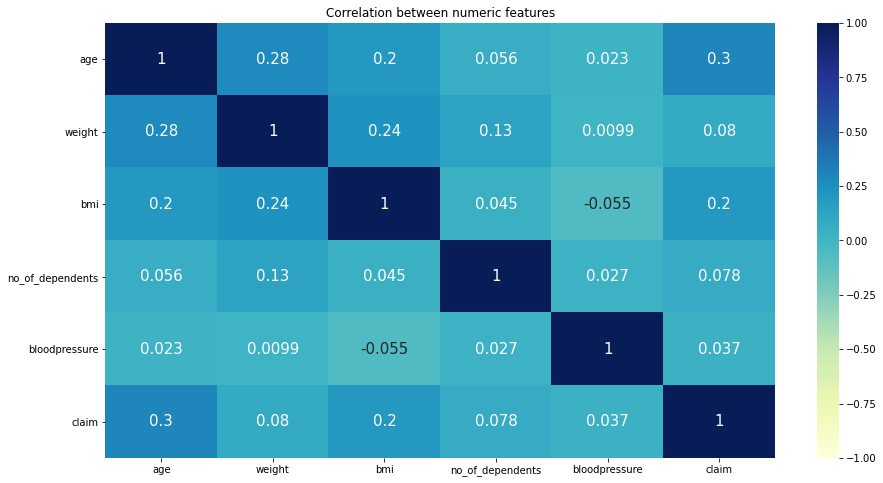

In [41]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

It is seen that the numeric variables are not correlated with each other even after removing the outliers since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data <br><br>

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

<a id='Normality'></a>
### 4.2.1 Check for Normality

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.

**1. Plot a histogram and also perform the Jarque-Bera test**

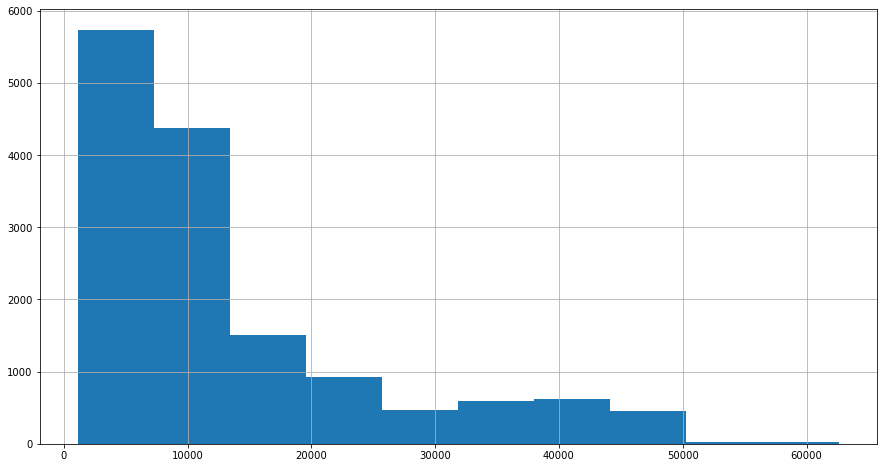

In [42]:
# check the distribution of target 
df_insurance.claim.hist()

# display the plot
plt.show()

From the above plot, we can notice that the variable 'claim' is heavily right skewed and not normally distributed<br>

Let us perform the Jarque-Bera( as the observations are more than 5000) test to check the normality of the target variable.

The null and alternate hypothesis of Jarque-Bera test are as follows: <br>
    
    H0: The data is normally distributed
    H1: The data is not normally distributed

In [43]:
# normality test using jarque_bera()
stat, p = jarque_bera(df_insurance["claim"])

print('Statistics=%.3f, p-value=%.3f' % (stat, p))
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=6571.030, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.<br><br>
                        Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable. <br></b>

**2. If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'claim' variable. We also store the transformed variable into our data frame with a new name, 'log_claim'.

In [44]:
# log transformation for normality using np.log()
df_insurance['log_claim'] = np.log(df_insurance['claim'])

# display first 5 rows of the data
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region,log_claim
0,60.0,male,64,24.3,NoDisease,1,0,72.0,0,0,Actor,13112.6,North-East,9.481329
1,49.0,female,75,22.6,NoDisease,1,0,78.0,1,1,Engineer,9567.0,North-East,9.166075
2,32.0,female,64,17.8,Epilepsy,2,1,88.0,1,1,Academician,32734.2,North-East,10.396176
3,61.0,female,53,36.4,NoDisease,1,1,72.0,1,0,Chef,48517.6,North-East,10.789682
4,19.0,female,50,20.6,NoDisease,0,0,82.0,1,0,HomeMakers,1731.7,North-East,7.456859


**3. Recheck for normality by plotting histogram and performing Jarque-Bera test**

Let us first plot a histogram of `log_claim`

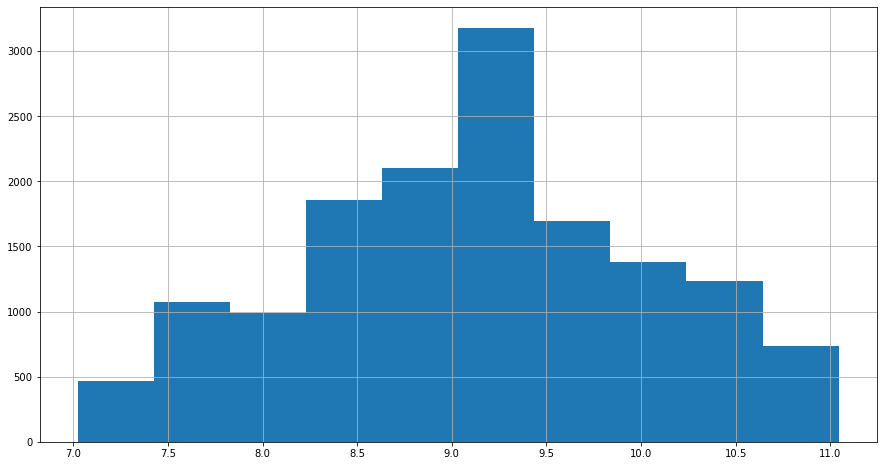

In [45]:
# recheck for normality 
# plot the histogram using hist
df_insurance.log_claim.hist()

# display the plot
plt.show()

It can be seen that the variable claim is near normally distributed. However we again confirm by Jarque Bera test</b>

Let us perform Jarque Bera test

In [46]:
# recheck normality by Jarque-Bera test
statn, pv = jarque_bera(df_insurance['log_claim'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=6571.030, p-value=0.000
The data is not normally distributed (reject H0)


It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim
<br>                    
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs
</b>

<a id='one_way_anova'></a>
### 4.2.2 One-Way Anova 

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. For example, we apply ANOVA to see whether the mean of claim is significantly different across gender<br>

The null and alternate hypothesis of one-way anova are as follows:<br>

    H0: Population means all are equal
    H1: Population means are not all equal

#### One Way Anova for 'Sex' on 'Claim'

In [47]:
# perform one way anova for sex on claim using f_oneway()
f_oneway(df_insurance['claim'][df_insurance['sex'] == 'male'], 
             df_insurance['claim'][df_insurance['sex'] == 'female'])

F_onewayResult(statistic=68.99835913263617, pvalue=1.070652488972223e-16)

The F-statistic = 68.99 and the p-value < 0.05, which indicates that there is a significant difference in the mean of the insurance claim across gender. We may consider building separate models for each gender. However, in this example we go ahead and build a single model for both genders.

<a id='dummy'></a>
### 4.2.3 Dummy Encoding of Categorical Variables

**1. Filter numerical and categorical variables**

In [48]:
# filter the numerical features in the dataset.
df_numeric_features = df_insurance.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim',
       'log_claim'],
      dtype='object')

In [49]:
# filter the categorical features in the dataset using select_dtypes()

df_categoric_features = df_insurance.select_dtypes(include=[np.object])

# display categorical features
df_categoric_features.columns

Index(['sex', 'hereditary_diseases', 'smoker', 'diabetes', 'regular_ex',
       'job_title', 'region'],
      dtype='object')

**2. Dummy encode the catergorical variables**

In [50]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    
   
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
    
    # axis=1: specifies that the concatenation is column wise
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

**3. Concatenate numerical and dummy encoded categorical variables**

In [51]:
# concatenate the numerical and dummy encoded categorical variables using concat()

df_insurance_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_insurance_dummy.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,60.0,64,24.3,1,72.0,13112.6,9.481329,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,49.0,75,22.6,1,78.0,9567.0,9.166075,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,32.0,64,17.8,2,88.0,32734.2,10.396176,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,61.0,53,36.4,1,72.0,48517.6,10.789682,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19.0,50,20.6,0,82.0,1731.7,7.456859,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Thus we have obtained the dummy coded variables. <br><br>
                        Note: Now the categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable. So for variable 'region', which has 5 levels, it has created 4 dummy encoded variables. Similarly, variable 'smoker' has 2 levels and it has created 1 dummy encoded variable.


<a id='LinearRegression'></a>
## 5. Linear Regression (OLS)

<a id='withLog'></a>
### 5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

**1. Split the data into training and test sets**

In [52]:
# add the intercept column to the dataset
df_insurance_dummy = sm.add_constant(df_insurance_dummy)

# separate the independent and dependent variables
X = df_insurance_dummy.drop(['claim','log_claim'], axis=1)

# extract the target variable from the data set
y = df_insurance_dummy[['log_claim','claim']]

# split data into train subset and test subset for predictor and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 56)
The shape of X_test is: (3681, 56)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


In [53]:
df_insurance_dummy.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,1.0,60.0,64,24.3,1,72.0,13112.6,9.481329,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,49.0,75,22.6,1,78.0,9567.0,9.166075,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,32.0,64,17.8,2,88.0,32734.2,10.396176,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,61.0,53,36.4,1,72.0,48517.6,10.789682,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,19.0,50,20.6,0,82.0,1731.7,7.456859,0,0,...,0,0,0,0,0,0,0,1,0,0


**2. Build model using sm.OLS().fit()**

In [54]:
# build a full model using OLS()
# consider the log of claim 
linreg_full_model_withlog = sm.OLS(y_train["log_claim"], X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_claim   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     584.1
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:47:26   Log-Likelihood:                -7083.9
No. Observations:               11042   AIC:                         1.428e+04
Df Residuals:                   10986   BIC:                         1.469e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<b>This model explains 74.5% of the variation in dependent variable claim.The Durbin-Watson test statistics is 2.008 and indicates that there is no autocorrelation. The Condition Number 4610 suggests that there is severe collinearity.


**3. Predict the values using test set**

In [55]:
# predict the 'log_claim' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

 Note that the predicted values are log transformed claim. In order to get claim values, we take the antilog of these predicted values by using the function np.exp()


In [56]:
# take the exponential of predictions using np.exp()
predicted_claim = np.exp(linreg_full_model_withlog_predictions)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**4. Compute accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [57]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

**5. Tabulate the results**

In [60]:
# create dataframe 'score_card'
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [61]:
# compile the required information
linreg_full_model_withlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj     
                   })

# append our result table using append()
score_card = score_card.append(linreg_full_model_withlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055


<a id='withoutLog'></a>
### 5.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'claim' variable as it is.

**1. Build model using sm.OLS().fit()**

In [63]:
# ordinary least squares regression
# we use the train and test sets from the previous model
# however, now we shall build a model using the variable 'claim' 

# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['claim'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.8
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:53:26   Log-Likelihood:            -1.1150e+05
No. Observations:               11042   AIC:                         2.231e+05
Df Residuals:                   10986   BIC:                         2.235e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 76.5% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 4610 suggests that there is severe collinearity.


#### Calculate the p-values to know the insignificant variables

In [64]:
# calculate the p-values for all the variables
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

,P-Value
const,3.159768e-02
age,0.000000e+00
weight,3.359551e-18
bmi,8.388984e-97
no_of_dependents,3.481205e-25
bloodpressure,1.030555e-06
sex_male,9.913783e-01
hereditary_diseases_Arthritis,7.119022e-03
hereditary_diseases_Cancer,4.373472e-01
hereditary_diseases_Diabetes,7.693355e-03


The above table shows the p-values for all the variables to decide the significant variables

Let's create a list of insignificant variables

In [65]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['sex_male',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_Obesity',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Chef',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessional',
 'job_title_Journalist',
 'job_title_Labourer',
 'job_title_Lawyer',
 'job_title_Police',
 'job_title_Technician',
 'region_North-East',
 'region_Southern',
 'region_West']

<b> These are the insignificant variables because their p-value is greater than 0.05.<br><br>

Notice, the variable 'sex_male' is insignificant. It implies that a persons gender does not affect the claim. Hence, we shall consider this variable to be insignificant.<br><br>
Out of the 9 hereditary diseases, there are 3 diseases which are insignificant. Considering, 'hereditary diseases' as whole we must include it in the data. <br><br>
There are 25, out of the total 35, professions/designations which are insignificant. Hence, it can be considered as redundant variable.<br><br>
Similarly for the variable region only 1 region is significantly contributing to the target variable. So we shall exclude the variable.
</b>

**2. Predict the values using test set**

In [66]:
# predict the claim using predict()
predicted_claim = linreg_full_model_withoutlog.predict(X_test)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [67]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

**4. Tabulate the results**

In [69]:
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj     
                   })

# append our result table using append()
score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909


<b> On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'claim' is lower than the other model. And, the RMSE value of the model without considering the log transformation is considerably lower. So, we continue with variable 'claim' as it is, instead of opting for log transformation
</b>

<a id='Finetuning'></a>
## 5.3. Fine Tune Linear Regression Model (OLS)

<a id='RemovingInsignificantVariable'></a>
### 5.3.1 Linear Regression after Removing Insignificant Variable (OLS)

The null and alternate hypothesis of linear regression as follows: <br>
    
    H0: All beta coefficients are zero
    H1: At least one beta coefficient is not zero

From the summary output of our linear regression model in section 5.2, we notice some of the variables are insignificant.

Now, we go ahead and build our next model without considering the above mentioned insignificant variables.

**1. Consider the significant variables**

In [71]:
# drop the insignificant variables
X_significant = df_insurance.drop(["sex","job_title","region","claim","log_claim"], axis=1)

In [72]:
# filter the categorical features in the dataset using select_dtypes()

df_significant_categoric_features = X_significant.select_dtypes(include=[np.object])

# display categorical features
df_significant_categoric_features.columns

Index(['hereditary_diseases', 'smoker', 'diabetes', 'regular_ex'], dtype='object')

**Dummy encode the catergorical variables**

In [73]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_significant_categoric_features.columns.values:
    
    
    dummy_encoded_variables = pd.get_dummies(df_significant_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    
    df_significant_categoric_features = pd.concat([df_significant_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    df_significant_categoric_features.drop([col], axis=1, inplace=True)

**Concatenate numerical and dummy encoded categorical variables**

In [74]:
# concatenate the numerical and dummy encoded categorical variables using concat()
df_insurance_significant = pd.concat([df_numeric_features, df_significant_categoric_features], axis=1)

# display data with dummy variables
df_insurance_significant.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1
0,60.0,64,24.3,1,72.0,13112.6,9.481329,0,0,0,0,0,0,0,1,0,0,0,0
1,49.0,75,22.6,1,78.0,9567.0,9.166075,0,0,0,0,0,0,0,1,0,0,1,1
2,32.0,64,17.8,2,88.0,32734.2,10.396176,0,0,0,1,0,0,0,0,0,1,1,1
3,61.0,53,36.4,1,72.0,48517.6,10.789682,0,0,0,0,0,0,0,1,0,1,1,0
4,19.0,50,20.6,0,82.0,1731.7,7.456859,0,0,0,0,0,0,0,1,0,0,1,0


**2. Split the data into training and test sets**

In [76]:
# add the intercept column to the dataset
df_insurance_significant = sm.add_constant(df_insurance_significant)

# separate the independent and dependent variables
X = df_insurance_significant.drop(['claim','log_claim'], axis=1)

# extract the target variable from the data set
y = df_insurance_significant[['log_claim','claim']]

# split data into train subset and test subset for predictor and target variables
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 56)
The shape of X_test is: (3681, 56)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


**1. Build model using sm.OLS().fit()**

In [78]:
# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train['claim'], X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     2064.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:56:58   Log-Likelihood:            -1.1160e+05
No. Observations:               11042   AIC:                         2.232e+05
Df Residuals:                   11024   BIC:                         2.234e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 76.1% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.982 and indicates that there is no autocorrelation. The Condition Number is 3670 suggests that there is severe collinearity.
</b>

**2. Predict the values using test set**

In [79]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [80]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj 

**4. Tabulate the results**

In [81]:
# compile the required information
linreg_model_with_significant_var_metrics = pd.Series({
                     'Model_Name': "Linreg full model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_model_with_significant_var_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096


<a id='Assumptions'></a>
### 5.3.2 Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='Autocorrelation'></a>
### 5.3.2.1 Detecting Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.
Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows: <br>
        
          H0: There is no autocorrelation in the residuals
          H1: There is autocorrelation in the residuals

**The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation**

**we see that the Durbin-Watson static is  1.980**

**Hence we can conclude that there is no autocorrelation**

<a id='Heteroskedasticity'></a>
### 5.3.2.2 Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [82]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()

test = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)           

[('f-value', 1015.2273076491579), ('p-value', 4.976780161297493e-205)]

We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.


<a id='Linearity_of_Residuals'></a>
### 5.3.2.3 Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.<br><br>The independent variables must have a linear relationship with the dependent variable.

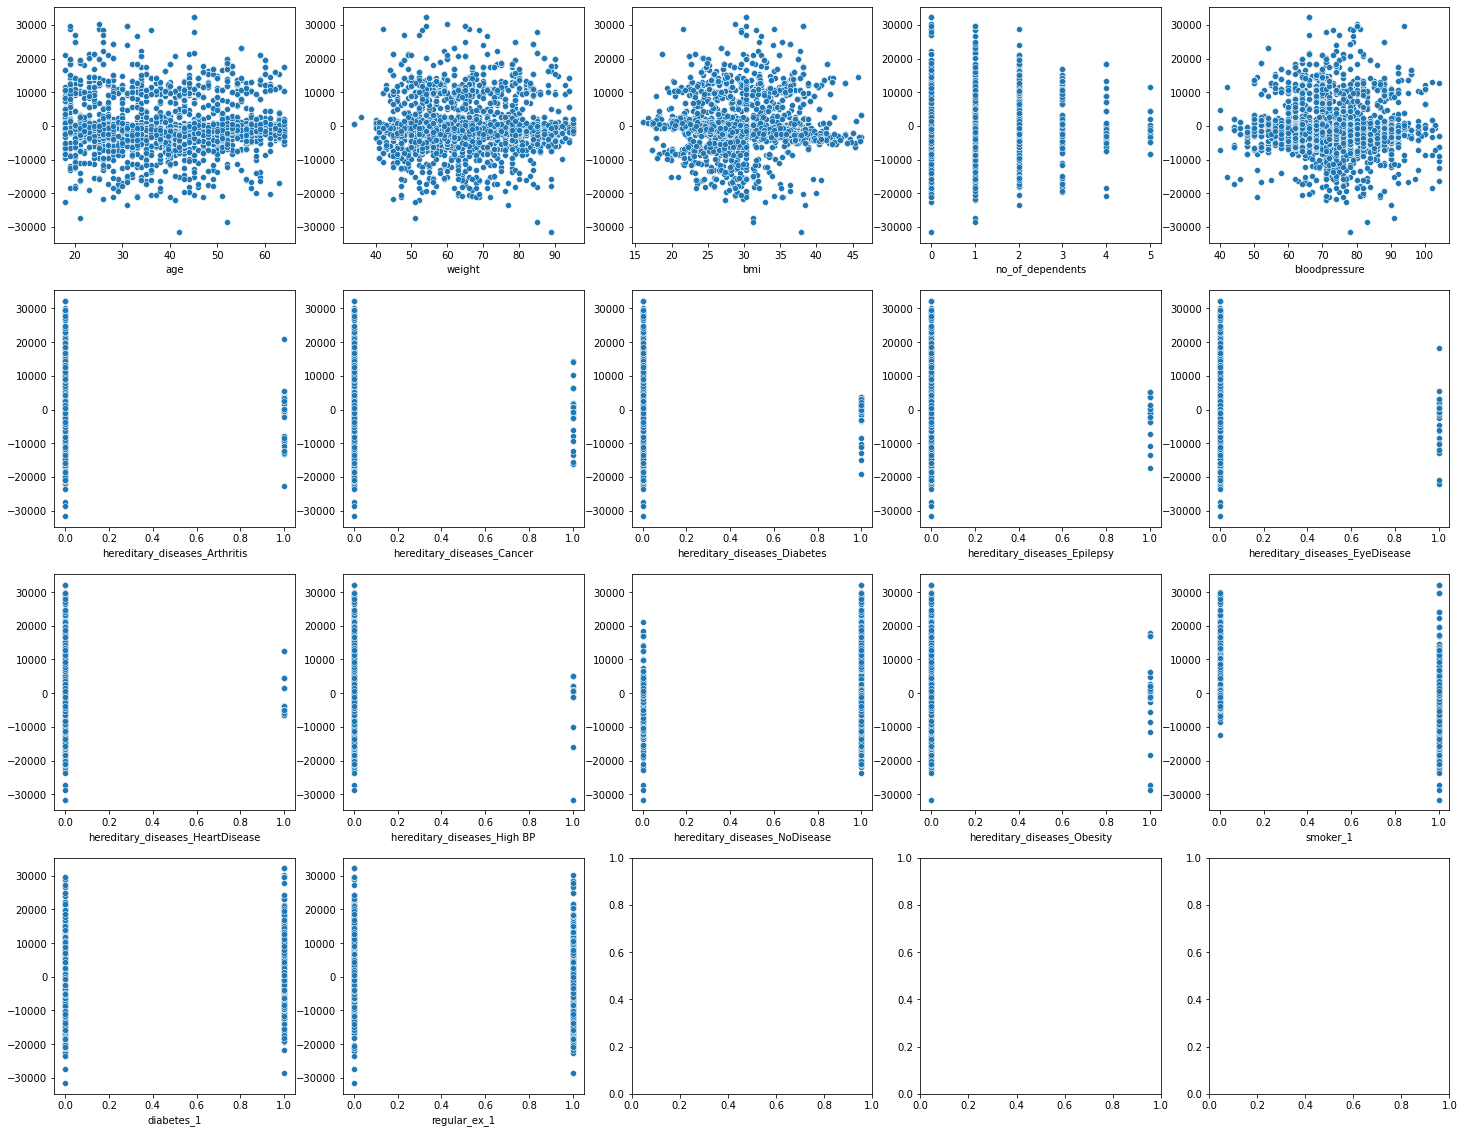

In [83]:
# create subplots of scatter plots

fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)

for variable, subplot in zip(X_train_significant.columns[1:], ax.flatten()):
    sns.scatterplot(X_train_significant[variable], linreg_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.


<a id='Normality_of_Residuals'></a>
### 5.3.2.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

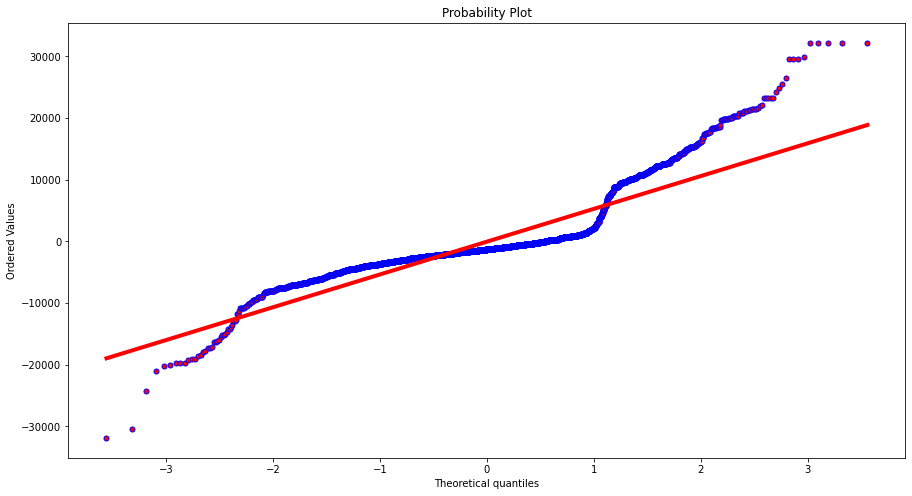

In [84]:
# calculate fitted values
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)

# calculate residuals
resids = actual_claim - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# plot the probability plot to check the normality of the residuals

stats.probplot(resids, plot=plt)

# set the marker type using the set_marker() parameter

# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

 Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.


**The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)** 

In [85]:
# check the mean of the residual
linreg_model_with_significant_var.resid.mean()

4.752764633180784e-11

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

**Perform Jarque Bera test to check normality of the residuals**

In [86]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(resids)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=4744.770, p-value=0.000
The data is not normally distributed (reject H0)


<b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.<br>

<a id='RemovingInsignificantVariable_scaleddata'></a>
### 5.3.3 Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.<br><br>
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).<br><br>

Let's build a model on significant variables using standardization.

**1. Perform standardization on train data**

In [87]:
# scale the numeric variables
df_num_scaled = df_numeric_features.apply(lambda rec: (rec - rec.mean()) / rec.std())

# create a dataframe
df_insurance_scaled = pd.concat([df_num_scaled, df_categoric_features], axis = 1)

# add constant to the data
df_insurance_scaled =sm.add_constant(df_insurance_scaled)

In [88]:
# on doing the predictions to compute RMSE the we need to unscale the predictions
# so we store the original mean and standard deviation of the data
mean_numeric_features = df_numeric_features.mean()

# store the standard deviation as 'std_numeric_features'
std_numeric_features = df_numeric_features.std()

**2. Split the data into training and test sets**

In [89]:
# separate the independent and dependent variables
X = df_insurance_scaled.drop(['claim','log_claim'], axis=1)

# extract the target variable from the train set
y = df_insurance_scaled['claim']

# split data into train subset and test subset for predictor and target variables
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_scaled is:",X_train_scaled.shape)

# print dimension of predictors test set
print("The shape of X_test_scaled is:",X_test_scaled.shape)

# print dimension of target train set
print("The shape of y_train_scaled is:",y_train_scaled.shape)

# print dimension of target test set
print("The shape of y_test_scaled is:",y_test_scaled.shape)

The shape of X_train_scaled is: (11042, 56)
The shape of X_test_scaled is: (3681, 56)
The shape of y_train_scaled is: (11042,)
The shape of y_test_scaled is: (3681,)


**3. Consider only the significant variables**

In [90]:
# consider the significant variable in the training set
X_train_scaled_significant = X_train_scaled.drop(insigni_var, axis=1)

# consider the significant variable in the training set
X_test_scaled_significant = X_test_scaled.drop(insigni_var, axis=1)

**4. Build model using sm.OLS().fit()**

In [92]:
# ordinary least squares regression
# build a full model with significant scaled variables using OLS()
linreg_model_with_significant_scaled_vars = sm.OLS(y_train_scaled,X_train_scaled_significant).fit()

# to print the summary output
print(linreg_model_with_significant_scaled_vars.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1551.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:02:05   Log-Likelihood:                -7772.7
No. Observations:               11042   AIC:                         1.559e+04
Df Residuals:                   11018   BIC:                         1.577e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 76.4% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.982 and indicates that the is no autocorrelation. The Condition Number is 30.4 suggests that there is no collinearity


**5. Predict the values using test set**

In [93]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_scaled_vars.predict(X_test_scaled_significant)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [94]:
# calculate rmse using rmse()
linreg_model_with_significant_scaled_vars_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
linreg_model_with_significant_scaled_vars_rsquared = linreg_model_with_significant_scaled_vars.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_scaled_vars_rsquared_adj = linreg_model_with_significant_scaled_vars.rsquared_adj 

**7. Tabulate the results**

In [95]:
# compile the required information
linreg_model_with_significant_scaled_vars_metrics = pd.Series({
                     'Model_Name': "Linreg with scaled significant variables",
                     'RMSE': linreg_model_with_significant_scaled_vars_rmse,
                     'R-Squared': linreg_model_with_significant_scaled_vars_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_scaled_vars_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_model_with_significant_scaled_vars_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,Linreg with scaled significant variables,0.763999,0.763506,5923.418017


 On comparing the above models, it is seen that the RMSE value for the model considering scaled data is higher than the other model. Also the R-squared and Adj. R-squared values have slightly reduced. So, for further analysis we use the unscaled data


<a id='Interaction'></a>
### 5.3.4 Linear Regression with Interaction (OLS)

Let us now see the effect on the linear regression model on adding an interaction effect of two significant variables

An interaction effect occurs when the effect of one variable depends on another variable. This combined effect may or may not improve the performance of the model

Comparing the coefficient of determination with and without the interaction term:<br>
The model for which interaction term is considered, the coefficient of determination may vary. It is crucial to check for the significance of the interaction term. If the term is found to be significant then the coefficient of determination increases. If the term is not significant, there is not much change in the coefficient of determination.


**1. Compute the interaction effect**

In [96]:
# create a copy of the entire dataset to add the interaction effect using copy()
df_insurance_interaction = df_insurance_dummy.copy()

# add the interaction variable
df_insurance_interaction['bmi*smoker'] = df_insurance_interaction['bmi']*df_insurance_interaction['smoker_1'] 

# print the data with interaction
df_insurance_interaction.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,...,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,bmi*smoker
0,1.0,60.0,64,24.3,1,72.0,13112.6,9.481329,1,0,...,0,0,0,0,0,0,1,0,0,0.0
1,1.0,49.0,75,22.6,1,78.0,9567.0,9.166075,0,0,...,0,0,0,0,0,0,1,0,0,0.0
2,1.0,32.0,64,17.8,2,88.0,32734.2,10.396176,0,0,...,0,0,0,0,0,0,1,0,0,17.8
3,1.0,61.0,53,36.4,1,72.0,48517.6,10.789682,0,0,...,0,0,0,0,0,0,1,0,0,36.4
4,1.0,19.0,50,20.6,0,82.0,1731.7,7.456859,0,0,...,0,0,0,0,0,0,1,0,0,0.0


**2. Split the data into training and test sets**

Notice that there is a change in the data set. We have added a variable(bmi*smoker), we consider this data as our new data. We again spilt the data into a train and test set keeping the random_state as the same as before (please refer section 5.1 to confirm)

In [98]:
# separate the independent and dependent variables

X = df_insurance_interaction.drop(['claim','log_claim'], axis=1)

# extract the target variable from the train set
y = df_insurance_interaction['claim']

# split data into train subset and test subset for predictor and target variables
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (11042, 57)
The shape of X_test_interaction is: (3681, 57)
The shape of y_train is: (11042,)
The shape of y_test is: (3681,)


**3. Build model using sm.OLS().fit()**

In [100]:
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     796.1
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:03:28   Log-Likelihood:            -1.1055e+05
No. Observations:               11042   AIC:                         2.212e+05
Df Residuals:                   10985   BIC:                         2.216e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 80.2% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 4620 suggests that there is severe collinearity. The collinearity is likely to increase because of the interaction effect.

**4. Predict the values using test set**

In [101]:
# predict the 'claim' using predict()
predicted_claim = linreg_with_interaction.predict(X_test_interaction)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [102]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

**6. Tabulate the results**

In [103]:
# compile the required information
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })

# append our result table using append()
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,Linreg with scaled significant variables,0.763999,0.763506,5923.418017
5,linreg_with_interaction,0.802319,0.801311,5547.061558


<b>From the summary output, the interaction component has a p-value of 0 indicating it is highly significant. The R-squared and adjusted R-squared value have also significantly increased. This output justifies that addition of an interaction effect has positively contributed to the performance of the model.

<a id='regularization'></a>
## 6. Regularization (OLS)

Overfitting occurs when an algorithm fits the data too well.  Specifically, overfitting occurs if the algorithm shows low bias but high variance.  It is often a result of an excessively complicated model. This can be prevented by fitting multiple models and using cross-validation to compare their predictive accuracies on test data.

Underfitting occurs when an algorithm cannot capture the underlying trend of the data. Intuitively, it occurs when the algorithm does not fit the data well enough. Specifically, it occurs if the model or algorithm shows low variance but high bias. It is often a result of an excessively simple model

One of the challenge in machine learning is that our algorithm must perform well on new, previously unseen data - not just those on which our model was trained. This ability to perform well on previously unobserved data is called generalization. Generalization error is defined as the expected value of the error on a new data. Regularization is any modification we make to a learning algorithm that is intended to reduce it generalization error but not its training error. (Ref. Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville)

Now we will perform regularization to check whether this technique performs better than our linear regression models without regularization</b>


<a id='Ridge_Regression'></a>
### 6.1 Ridge Regression (OLS)

**1. Split the data in the form of train and test sets**

We shall use the scaled data. The train test split is alread conducted for the scaled data.

**2. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics**

We first create a list of all the variable names and accuracy metrics whose values we want.

In [104]:
# compile the column names of the output dataframe
# add the names of metrics used for comparing the models
# these metrics are used for both lasso and ridge regression

# create list of variable names
col = list(X_train_scaled.columns)

# add 'Sum of square of Residuals' to the list
col.append('ssr')

# add 'R squared' to the list
col.append('R squared')

# add 'Adj. R squared' to the list
col.append('Adj. R squared')

# add 'Root mean Squared Error' to the list
col.append('RMSE')

Fit a linear regression model by the OLS method.

In [105]:
# build a OLS model using OLS()
ridge_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted ridge model
results_fu = ridge_regression.fit()

In a for loop we pass different values of alpha. We tabulate all beta coeffients.

In [106]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.1001, 0.2001, 0.3001, 0.4001, 0.5001 and 10.0001
for n in np.arange(0.0001,10.1, 0.1).tolist():
    
    # fit a rigde regression to the linear model built using OLS
    # L1_wt=0: conducts ridge regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)
    
    # fit the model
   
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression, 
                                             params=results_fr.params, 
                                             normalized_cov_params=ridge_regression.normalized_cov_params)
    
    # compute the rmse
    # calling the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
  
    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # append the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # converting the list to a dataframe.
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe  
df_params.index=np.arange(0.0001, 10.1, 0.1).tolist()

# add the first column name alpha to the data frame. 
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display the output
df_params

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,...,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,0.453691,0.303877,-0.045268,0.105915,0.049688,0.023233,0.000194,-0.174963,0.071336,-0.162878,...,0.074953,0.085975,-0.027626,-0.007671,0.006995,-0.010529,2626.464166,0.765420,0.764246,17586.315699
0.1001,0.076848,0.267600,-0.033467,0.111478,0.046126,0.029756,0.040365,0.046425,0.060063,0.060489,...,0.012131,0.027831,-0.028143,0.012071,0.018104,0.012739,3588.836444,0.679467,0.677862,17586.465010
0.2001,0.042317,0.241811,-0.023462,0.109792,0.043677,0.029798,0.043222,0.035067,0.041836,0.046066,...,0.006529,0.016257,-0.020118,0.008384,0.011091,0.009854,4662.097427,0.583610,0.581525,17586.536449
0.3001,0.028452,0.221560,-0.015830,0.106149,0.041445,0.028770,0.040723,0.027925,0.032588,0.036986,...,0.004370,0.010064,-0.015731,0.006237,0.007453,0.007813,5494.356124,0.509277,0.506821,17586.579538
0.4001,0.021112,0.204930,-0.010002,0.101923,0.039386,0.027451,0.037399,0.023142,0.026818,0.030878,...,0.003272,0.006315,-0.012924,0.004930,0.005394,0.006418,6131.795098,0.452345,0.449603,17586.608737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6001,0.000818,0.028461,0.006171,0.017793,0.006917,0.003962,0.003778,0.001308,0.001662,0.001935,...,0.000205,-0.001242,-0.000703,0.000293,0.000163,0.000307,10639.088511,0.049781,0.045024,17586.773030
9.7001,0.000810,0.028200,0.006125,0.017633,0.006855,0.003925,0.003742,0.001295,0.001646,0.001915,...,0.000203,-0.001232,-0.000696,0.000290,0.000162,0.000304,10644.234534,0.049321,0.044562,17586.773189
9.8001,0.000802,0.027943,0.006080,0.017477,0.006795,0.003889,0.003707,0.001282,0.001629,0.001896,...,0.000201,-0.001223,-0.000689,0.000288,0.000160,0.000301,10649.285999,0.048870,0.044108,17586.773345


Let us compare the results for low and high values of alpha

In [108]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,...,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,0.453691,0.303877,-0.045268,0.105915,0.049688,0.023233,0.000194,-0.174963,0.071336,-0.162878,...,0.074953,0.085975,-0.027626,-0.007671,0.006995,-0.010529,2626.464166,0.765420,0.764246,17586.315699
0.1001,0.076848,0.267600,-0.033467,0.111478,0.046126,0.029756,0.040365,0.046425,0.060063,0.060489,...,0.012131,0.027831,-0.028143,0.012071,0.018104,0.012739,3588.836444,0.679467,0.677862,17586.465010
9.9001,0.000795,0.027692,0.006035,0.017323,0.006736,0.003853,0.003673,0.001269,0.001613,0.001877,...,0.000199,-0.001213,-0.000682,0.000285,0.000159,0.000298,10654.245505,0.048427,0.043663,17586.773498
10.0001,0.000787,0.027444,0.005991,0.017172,0.006678,0.003818,0.003639,0.001256,0.001598,0.001859,...,0.000197,-0.001204,-0.000675,0.000282,0.000158,0.000295,10659.115553,0.047992,0.043226,17586.773649


<b>The sum of squares of residual, increases with increase in alpha, this reduces model complexity.
Compare the coefficients in the first and second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares.<br><br>


**3. Find the alpha for which RMSE is minimum**

Now, to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [109]:
# find the alpha value for which RMSE is minimum
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


Thus, we may say the model obtained by alpha = 0.0001 is performing the best since has the lowest root mean squared error.

**In ridge regression, coefficients may tend to zero yet are never zero. This can be checked by the follwing code**

In [110]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.0001     0
0.1001     0
0.2001     0
0.3001     0
0.4001     0
          ..
9.6001     0
9.7001     0
9.8001     0
9.9001     0
10.0001    0
Length: 101, dtype: int64

For all alpha values, the corresponding value is zero which impiles there are **no** coefficients with value zero.

**4. Fit a ridge model by substituting the alpha value obtained in step 3**

We know that when aplha = 0.0001, the model performs better than other since it has the lowest RMSE and highest adjusted R- squared value. Let us now find its summary output.

In [111]:
# build a ridge model for the desired alpha 
# L1_wt=0: conducts ridge regression

results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)

# fit the model 

ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression, 
                                        params=results_fr.params, 
                                        normalized_cov_params=ridge_regression.normalized_cov_params)

# print the summary output 
print (ridge_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.8
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:06:37   Log-Likelihood:                -7739.4
No. Observations:               11042   AIC:                         1.559e+04
Df Residuals:                   10986   BIC:                         1.600e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is  1.98 which indicates that there is no autocorrelation. The Condition Number is 74.5 suggests that there is no collinearity.

**5. Predict the values using test set**

In [112]:
# predict the scaled claim using predict()
predicted_claim = ridge_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [113]:
# calculate rmse using rmse()
ridge_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
ridge_regression_best_rsquared = ridge_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
ridge_regression_best_rsquared_adj = ridge_regression_best.rsquared_adj 

**7. Tabulate the results**

In [114]:
# compile the required information
ridge_regression_best_metrics = pd.Series({
                     'Model_Name': "Ridge Regression",
                     'RMSE': ridge_regression_best_rmse,
                     'R-Squared': ridge_regression_best_rsquared,
                     'Adj. R-Squared': ridge_regression_best_rsquared_adj     
                   })

# append our result table using append()
score_card = score_card.append(ridge_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,Linreg with scaled significant variables,0.763999,0.763506,5923.418017
5,linreg_with_interaction,0.802319,0.801311,5547.061558
6,Ridge Regression,0.765420,0.764246,5915.691774


<b>Notice that R-squared and Adjusted R-squared values have decreased and the RMSE value has increased.

<a id='Lasso_Regression'></a>
### 6.2 Lasso Regression (OLS)
Lasso regression shrinks the less important variable's coefficient to zero. Thus, removing some variables completely. So, this works well for feature selection in case we have a large number of features.
For lasso regression, we follow a very similar process to ridge regression.

**1. Fit a regression model using OLS method**

In [115]:
# we use the scaled data
# build a OLS model using OLS()
lasso_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted lasso model
results_fu = lasso_regression.fit()

**2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics**

In [116]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be  0.0001, 0.0002 ,0.0003, 0.0004 ,0.0005 to 0.0199
for n in np.arange(0.0001, 0.02, 0.0001).tolist():
    
    # fit a lasso regression to the linear model built using OLS
    # L1_wt=1: conducts lasso regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)
     
    # fit the model 
    results_fr_fit = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                                params=results_fr.params, 
                                                normalized_cov_params=lasso_regression.normalized_cov_params)
    
    # calculate the rmse
    # predict the claim on test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
  
    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # append the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # convert the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe    
df_params.index=np.arange(0.0001, 0.02, 0.0001).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,...,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,0.467027,0.303779,-0.044975,0.105456,0.049699,0.023338,0.0,-0.161452,0.054325,-0.152012,...,0.061639,0.073042,-0.033166,-0.007683,0.005909,-0.010706,2626.902306,0.765381,0.764206,17586.315679
0.0002,0.453974,0.303409,-0.044561,0.105082,0.049784,0.023346,0.0,-0.128508,0.055247,-0.121484,...,0.052842,0.064563,-0.034274,0.000000,0.009348,-0.006442,2628.257318,0.765260,0.764085,17586.315804
0.0003,0.443546,0.303216,-0.044194,0.104822,0.049769,0.023432,0.0,-0.101251,0.051549,-0.095818,...,0.046315,0.058632,-0.033369,0.000000,0.011430,0.000000,2629.869804,0.765116,0.763940,17586.315929
0.0004,0.437047,0.303019,-0.043866,0.104545,0.049764,0.023511,0.0,-0.075623,0.045827,-0.071782,...,0.040405,0.053325,-0.031708,0.000000,0.010886,0.000000,2631.935593,0.764931,0.763755,17586.316141
0.0005,0.433972,0.302899,-0.043527,0.104406,0.049717,0.023728,0.0,-0.054818,0.000000,-0.052817,...,0.034227,0.047757,-0.030218,0.000000,0.010446,0.000000,2634.964896,0.764661,0.763483,17586.316501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0195,0.000000,0.277156,-0.017745,0.099191,0.028533,0.009000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2881.669871,0.742627,0.741338,17586.361035
0.0196,0.000000,0.277048,-0.017587,0.099118,0.028443,0.008912,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2882.622613,0.742542,0.741253,17586.361193
0.0197,0.000000,0.278623,-0.019811,0.103113,0.030072,0.009656,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2930.218779,0.738291,0.736980,17586.364656


Let us compare the results for low and high values of alpha

In [117]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,...,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,0.467027,0.303779,-0.044975,0.105456,0.049699,0.023338,0.0,-0.161452,0.054325,-0.152012,...,0.061639,0.073042,-0.033166,-0.007683,0.005909,-0.010706,2626.902306,0.765381,0.764206,17586.315679
0.0002,0.453974,0.303409,-0.044561,0.105082,0.049784,0.023346,0.0,-0.128508,0.055247,-0.121484,...,0.052842,0.064563,-0.034274,0.000000,0.009348,-0.006442,2628.257318,0.765260,0.764085,17586.315804
0.0198,0.000000,0.278500,-0.019631,0.103004,0.029967,0.009560,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2930.849415,0.738234,0.736924,17586.364784
0.0199,0.000000,0.278376,-0.019451,0.102894,0.029861,0.009464,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2931.483244,0.738178,0.736867,17586.364911


* The sum of squares of residual, increases with increase in alpha, this reduces model complexity. Compare the coefficients in the first to the second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares<br>

**3. Find the alpha for which RMSE is minimum**

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error

In [118]:
# find the alpha value for which RMSE is minimum

alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


We may say the model obtained by alpha = 0.0001 is performing the best.

**In lasso regression, coefficients may be zero. This can be checked by the following code**

In [120]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.0001     8
0.0002    12
0.0003    15
0.0004    15
0.0005    17
          ..
0.0195    48
0.0196    48
0.0197    49
0.0198    49
0.0199    49
Length: 199, dtype: int64

<b>For all alpha values, the corresponding value is zero which implies there are no coefficients with value zero. This happened since the number of variables considered in the data are less. Also only significant variables are considered. However, if we had considered a dataset with many variables (both significant and insignificant) then lasso regression and ridge regression would have shown significant performance.

**4. Fit a lasso model by substituting the alpha value obtained in step 3**

In [121]:
# fit the lasso regression model
# L1_wt=1: conducts lasso regression
results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=0.0001, start_params=results_fu.params)

# fit the lasso regression 
lasso_regression_best = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=lasso_regression.normalized_cov_params)

# print the summary output
print (lasso_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.6
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:13:27   Log-Likelihood:                -7740.3
No. Observations:               11042   AIC:                         1.559e+04
Df Residuals:                   10986   BIC:                         1.600e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<b>This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 74.5 suggests that there is no collinearity.
</b>

**5. Predict the values using test set**

In [122]:
# predict the 'claim' using predict()
predicted_claim = lasso_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [123]:
# calculate rmse using rmse()
lasso_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
lasso_regression_best_rsquared = lasso_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
lasso_regression_best_rsquared_adj = lasso_regression_best.rsquared_adj 

**7. Tabulate the results**

In [124]:
# compile the required information
lasso_regression_best_metrics = pd.Series({
                     'Model_Name': "Lasso Regression",
                     'RMSE': lasso_regression_best_rmse,
                     'R-Squared': lasso_regression_best_rsquared,
                     'Adj. R-Squared': lasso_regression_best_rsquared_adj     
                   })

# append our result table using append()
score_card = score_card.append(lasso_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,Linreg with scaled significant variables,0.763999,0.763506,5923.418017
5,linreg_with_interaction,0.802319,0.801311,5547.061558
6,Ridge Regression,0.765420,0.764246,5915.691774
7,Lasso Regression,0.765381,0.764206,5911.881942


<b>Notice that RMSE, R-squared and Adjusted R-squared values are the nearly same for ridge and lasso regression.
</b>

<a id='Elastic_Net'></a>
### 6.3 Elastic Net Regression (OLS)
In statistics, fitting of linear regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. The model is trained using both L1 & L2 that allows learning of sparse model where few entries are zero similar to Lasso and also maintaining the regularization properties similar to ridge regression.

**1. Fit a regression model using OLS method**

In [125]:
# build a OLS model using OLS()
elastic_net_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted elastic net model
results_fu = elastic_net_regression.fit()

**2. Use GridsearchCV to find the best penalty term**

When the l1_ratio is set to 0 it is the same as ridge regression. When l1_ratio is set to 1 it is lasso. Elastic net is somewhere between 0 and 1 when setting the l1_ratio. Therefore, in our grid, we need to set several values of this argument. Below is the code.

In [126]:
# normalize the data which is required for elastic net
elastic = ElasticNet(normalize=True)

# use gridsearchCV to find best penalty term 
# estimator: the method used to estimate the parameter of regression
# param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values
# scoring: a single string or a callable to evaluate the predictions on the test set
# n_jobs: number of jobs to run in parallel
# refit: refit an estimator using the best found parameters on the whole dataset
# CV: determines the cross-validation splitting strategy
search = GridSearchCV(estimator=elastic, 
                      param_grid={'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error', 
                      n_jobs=1, 
                      refit=True, 
                      cv=10)

In [127]:
# fit the model to get best parameter
search.fit(X_train_scaled, y_train_scaled)

# get best parameter
search.best_params_

{'l1_ratio': 0.2}

The best l1_ratio is 0.2.

**3. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics**

In [128]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.0101, 0.0201 and 1.9901
for n in np.arange(0.0001, 1.5, 0.01).tolist():
    
    # fitting a elastic net regression to the elastic net model built using OLS 
    # the l1_ratio is the same as l1_wt in the below function
    # L1_wt=0.8: conducts elastic net regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                        L1_wt= 0.2, 
                                                        alpha=n, 
                                                        start_params=results_fu.params)
     
    # obtaining the parameters of the fitted model 
   
    results_fr_fit = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                    params=results_fr.params, 
                                    normalized_cov_params=elastic_net_regression.normalized_cov_params)
    
    # calculate rmse
    # call the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtaining the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
  
    # compiling the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # appending the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # converting the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe    
df_params.index=np.arange(0.0001, 1.5, 0.01).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,...,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,0.469863,0.303919,-0.045199,0.105772,0.049731,0.023277,0.000070,-0.179246,0.060756,-0.168079,...,0.067665,0.078685,-0.033321,-0.0081,0.006305,-0.010975,2626.492384,0.765418,0.764243,17586.315646
0.0101,0.296789,0.297005,-0.040994,0.105499,0.046838,0.024980,0.005424,0.000000,0.000000,0.000000,...,0.000000,0.024042,0.000000,0.0000,0.000000,0.000000,2700.686679,0.758791,0.757583,17586.340242
0.0201,0.208687,0.289355,-0.037803,0.106700,0.043558,0.024296,0.007842,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,2786.283555,0.751146,0.749900,17586.361780
0.0301,0.143858,0.283713,-0.033841,0.106799,0.041299,0.022809,0.007936,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,2874.605191,0.743258,0.741972,17586.381208
0.0401,0.098786,0.278323,-0.029713,0.106379,0.039181,0.021202,0.007045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,2978.935296,0.733939,0.732607,17586.399005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.4501,0.000000,0.008283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,11022.377700,0.015548,0.010619,17586.782403
1.4601,0.000000,0.007329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,11039.430099,0.014025,0.009089,17586.783125
1.4701,0.000000,0.006382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,11056.341374,0.012514,0.007571,17586.783840


In [129]:
# to call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,...,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,
0.0001,0.469863,0.303919,-0.045199,0.105772,0.049731,0.023277,0.000070,-0.179246,0.060756,-0.168079,...,0.067665,0.078685,-0.033321,-0.0081,0.006305,-0.010975,2626.492384,0.765418,0.764243,17586.315646
0.0101,0.296789,0.297005,-0.040994,0.105499,0.046838,0.024980,0.005424,0.000000,0.000000,0.000000,...,0.000000,0.024042,0.000000,0.0000,0.000000,0.000000,2700.686679,0.758791,0.757583,17586.340242
1.4801,0.000000,0.005441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,11073.113405,0.011016,0.006065,17586.784547
1.4901,0.000000,0.004508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,11089.748037,0.009531,0.004572,17586.785247


**4. Find the alpha for which RMSE is minimum**

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [130]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


We may say the model obtained by alpha = 0.0001 is performing the best.

**In elastic net regression, coefficients may be zero. This can be checked by the following code.**

In [131]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.0001     3
0.0101    38
0.0201    45
0.0301    45
0.0401    45
          ..
1.4501    54
1.4601    54
1.4701    54
1.4801    54
1.4901    54
Length: 150, dtype: int64

<b>Apart from the expected inference of higher RMSE for higher alphas, we can see the many of the coefficients are zero even for very small values of alpha.<br>
                    For all alpha values, the corresponding value is the number of coefficients which implies there are coefficients with value zero.

**5. Fit a elastic net model by substituting the alpha value obtained in step 4**

In [132]:
# fit the elastic net regression model
results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                    L1_wt=0.2, 
                                                    alpha= 0.0001, 
                                                    start_params=results_fu.params)

# fit elastic net regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)

# print the summary output
print (elastic_net_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.7
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:14:22   Log-Likelihood:                -7739.4
No. Observations:               11042   AIC:                         1.559e+04
Df Residuals:                   10986   BIC:                         1.600e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<b>This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 74.5 suggests that there is severe collinearity.
</b>

**6. Predict the values using test set**

In [133]:
# predict the 'claim' using predict()
predicted_claim = elastic_net_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

**7. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [134]:
# calculate rmse using rmse()
elastic_net_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
elastic_net_regression_best_rsquared = elastic_net_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
elastic_net_regression_best_rsquared_adj = elastic_net_regression_best.rsquared_adj 

**8. Tabulate the results**

In [135]:
# compile the required information
elastic_net_regression_best_metrics = pd.Series({
                     'Model_Name': "Elastic net Regression",
                     'RMSE': elastic_net_regression_best_rmse,
                     'R-Squared': elastic_net_regression_best_rsquared,
                     'Adj. R-Squared': elastic_net_regression_best_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(elastic_net_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,Linreg with scaled significant variables,0.763999,0.763506,5923.418017
5,linreg_with_interaction,0.802319,0.801311,5547.061558
6,Ridge Regression,0.765420,0.764246,5915.691774
7,Lasso Regression,0.765381,0.764206,5911.881942
8,Elastic net Regression,0.765418,0.764243,5915.195796


* Notice that RMSE, R-squared and Adjusted R-squared values are very close for the ridge, lasso, and elastic net regression.

<a id='StochasticGradientDescent'></a>
## 7. Stochastic Gradient Descent - SGD

<a id='LinearRegressionwithStochasticGradientDescent'></a>
### 7.1 Linear Regression with SGD

Let us now perform linear regression using SGD.

**1. Create the train and test sets**

We use the orginal unscaled data.

The data is already split as train and training set.

**2. Fit the linear regression using the SGD**

In [136]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# build the model
linreg_with_SGD = SGDRegressor()

# we fit our model with train data
linreg_with_SGD = linreg_with_SGD.fit(X_train, y_train)

**3. Predict the values using test set**

In [137]:
# we use predict() to predict our values
linreg_with_SGD_predictions = linreg_with_SGD.predict(X_test)

**4. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared. 

In [138]:
# calculate mse
linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

# calculate R-squared
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

# calculate Adjusted R-squared
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

**5. Tabulate the results**

In [139]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,7.451616e-01,7.438857e-01,7.947405e+03
1,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
2,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
3,Linreg full model with significant variables,7.609239e-01,7.605553e-01,5.911155e+03
4,Linreg with scaled significant variables,7.639986e-01,7.635060e-01,5.923418e+03
5,linreg_with_interaction,8.023189e-01,8.013112e-01,5.547062e+03
6,Ridge Regression,7.654201e-01,7.642457e-01,5.915692e+03
7,Lasso Regression,7.653809e-01,7.642063e-01,5.911882e+03
8,Elastic net Regression,7.654175e-01,7.642431e-01,5.915196e+03
9,Linear Regression SGD,-1.177974e+16,-1.196177e+16,1.278959e+12


<b>Notice that R-squared and Adjusted R-squared values are negative and RMSE value is very high. It can be infered that this model does not perform good <br><br>
                        Note: Negative R-squared and negative Adjusted R-squared values are uninterpretable
</b>

Now we will perform the analysis using GridSearchCV.

<a id='StochasticGradientDescentwithGridSearchCV'></a>
### 7.2 Linear Regression with SGD using GridSearchCV

Now we show how a linear model is optimized by cross-validation, which is done using the 'sklearn.model_selection.GridSearchCV' object on a training set.

The performance of the selected hyper-parameters and trained model is then measured on the test set that was not used during the model building.

**1. Fit the linear regression using the SGD with GridSearchCV**

In [140]:
# to supress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import gridsearchcv from sklearn to optimize best parameter
from sklearn.model_selection import GridSearchCV

# Grid search 

# alpha is regularization term usually in the range 10.0**-np.arange(1,7).
# this will generate different alpha values like 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06

# loss="squared_loss": Ordinary least squares, 

# "l2": L2 norm penalty on coefficients (ridge regression), 
# "l1": L1 norm penalty on coefficients(lasso regression), "elasticnet": Convex combination of L2 and L1    
   
# The learning rate can be either constant or gradually decaying 
    
param_grid = { 'alpha': 10.0 ** -np.arange(1, 7), 
        
               'loss': ['squared_loss'], 
    
               'penalty': ['l2', 'l1', 'elasticnet'],
    
               'learning_rate': ['constant', 'optimal', 'invscaling']
}

# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
clf = GridSearchCV(linreg_with_SGD, param_grid)

# fit the model on train data
clf.fit(X_train, y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

Let us print the optimal parameters obtained by using GridSearchCV.

In [141]:
# print the best parameters
# print best alpha value
print('Best alpha:', clf.best_estimator_.alpha)

# print best tolerance
print('Best tol:', clf.best_estimator_.tol) 

# print best starting rate (Use eta0 to specify the starting learning)
print('Best eta0:', clf.best_estimator_.eta0)

# print best learning rate
print('Best learning rate:', clf.best_estimator_.learning_rate) 

Best alpha: 0.01
Best tol: 0.001
Best eta0: 0.01
Best learning rate: optimal


We have obtained the optimal parameters. Now substituting these values in SGDRegressor() we build the model.

In [142]:
# build the model using best parameters
# squared_loss: ordinary least squares loss
# 'eta0': specify the starting learning
linreg_SGD_using_best_parameter = SGDRegressor(alpha=1e-06,
                                               eta0=0.01, 
                                               learning_rate='optimal')

# fit the SGD model using best parameter
linreg_SGD_using_best_parameter.fit(X_train,y_train)

SGDRegressor(alpha=1e-06, learning_rate='optimal')

**2. Predict the values using test set**

In [143]:
# predict the values on test data using predict
linreg_SGD_using_best_parameter_predictions = linreg_SGD_using_best_parameter.predict(X_test)

**3. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared

In [144]:
# calculate mse
linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate rmse
linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)

# calculate R-squared
linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate Adjusted R-squared
linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

**4. Tabulate the results**

In [145]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_using_best_parameter_rmse ,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,7.451616e-01,7.438857e-01,7.947405e+03
1,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
2,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
3,Linreg full model with significant variables,7.609239e-01,7.605553e-01,5.911155e+03
4,Linreg with scaled significant variables,7.639986e-01,7.635060e-01,5.923418e+03
5,linreg_with_interaction,8.023189e-01,8.013112e-01,5.547062e+03
6,Ridge Regression,7.654201e-01,7.642457e-01,5.915692e+03
7,Lasso Regression,7.653809e-01,7.642063e-01,5.911882e+03
8,Elastic net Regression,7.654175e-01,7.642431e-01,5.915196e+03
9,Linear Regression SGD,-1.177974e+16,-1.196177e+16,1.278959e+12


<b>Notice that R-squared and Adjusted R-squared values are negative and RMSE value is very high. It can be infered that this model does not perform good. <br><br>
                        Note: Negative R-squared and negative Adjusted R-squared values are uninterpretable.

<a id='rmse_and_r-squared'></a>
## 8. Conclusion and Interpretation

To take the final conclusion, let us recall the result table again

In [146]:
# view the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,7.451616e-01,7.438857e-01,7.947405e+03
1,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
2,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
3,Linreg full model with significant variables,7.609239e-01,7.605553e-01,5.911155e+03
4,Linreg with scaled significant variables,7.639986e-01,7.635060e-01,5.923418e+03
5,linreg_with_interaction,8.023189e-01,8.013112e-01,5.547062e+03
6,Ridge Regression,7.654201e-01,7.642457e-01,5.915692e+03
7,Lasso Regression,7.653809e-01,7.642063e-01,5.911882e+03
8,Elastic net Regression,7.654175e-01,7.642431e-01,5.915196e+03
9,Linear Regression SGD,-1.177974e+16,-1.196177e+16,1.278959e+12


From the table we exclude 'Linear Regression SGD' and 'Linear regression SGD using best parameters' models since its outputs are uninterpretable.

In [147]:
# drop rows 8 and 9 from above table
score_card = score_card.drop(score_card.index[[8, 9]])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,7.451616e-01,7.438857e-01,7.947405e+03
1,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
2,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
3,Linreg full model with significant variables,7.609239e-01,7.605553e-01,5.911155e+03
4,Linreg with scaled significant variables,7.639986e-01,7.635060e-01,5.923418e+03
5,linreg_with_interaction,8.023189e-01,8.013112e-01,5.547062e+03
6,Ridge Regression,7.654201e-01,7.642457e-01,5.915692e+03
7,Lasso Regression,7.653809e-01,7.642063e-01,5.911882e+03
10,Linear Regression SGD,-5.973953e+21,-6.066266e+21,9.107926e+14


**Let visualize graphically the above table**

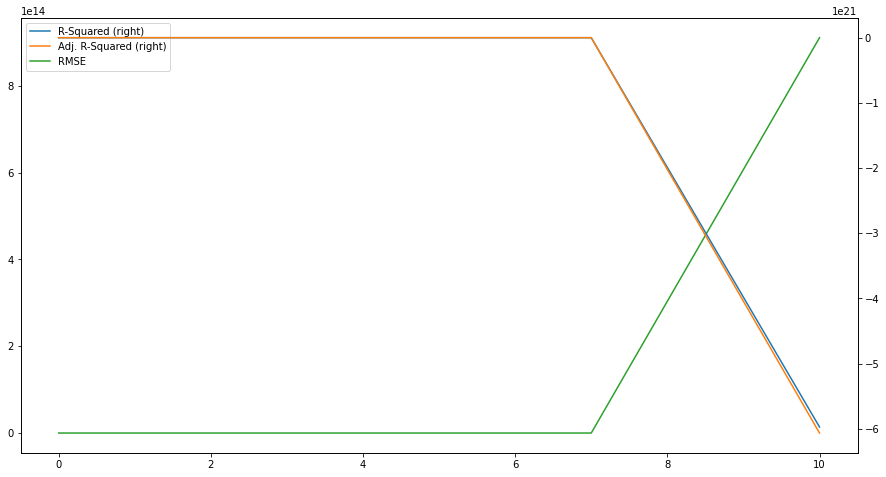

In [148]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.show()

The graph shows the performance metrics root mean squared error, R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, the better the R-squared value naturally the lesser is the RMSE value.
                    <br><br> Findings suggest that the linear regression with interaction algorithm has the highest accuracy with lowest RMSE. Finally, it can be concluded that the linear regression with interaction can be used by insurance company to predict claim amount for its customers.
</b>